**ข้อสอบ กลางภาค ปฏิบัติการ ปี 2567**
ดาวน์โหลด dataset จาก https://drive.google.com/file/d/1HkDLY5_Gnam7NDyelOUwThA-CDz3MP8M/view?usp=sharing

และไฟล์ jupyternotebook จาก https://colab.research.google.com/drive/1s3FWPypQF2HqhzaBoNXZss3plgN2WcIf?usp=sharing


In [73]:
#1 นำเข้า library ที่ต้องใช้
import pandas as pd
#2 อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv("fe_m67_car_prices_cut.csv") 
#3 แสดง DataFrame
print(df)

      year        make                model           trim       body  \
0     2015         Kia              Sorento             LX        SUV   
1     2015         Kia              Sorento             LX        SUV   
2     2014         BMW             3 Series     328i SULEV      Sedan   
3     2015       Volvo                  S60             T5      Sedan   
4     2014         BMW  6 Series Gran Coupe           650i      Sedan   
...    ...         ...                  ...            ...        ...   
1733  2012      Nissan                Versa          1.6 S      Sedan   
1734  2012       smart               fortwo  passion coupe  Hatchback   
1735  2012      Nissan               Altima          2.5 S      Sedan   
1736  2012  mitsubishi               galant            NaN        NaN   
1737  2012      Nissan               Altima          2.5 S      Sedan   

     transmission                vin state  condition  odometer   color  \
0       automatic  5xyktca69fg566472    ca      

In [74]:
#4 ตรวจสอบจำนวนข้อมูลที่ขาดหายในแต่ละคอลัมน์
missing_data = df.isnull().sum()
print(missing_data)

year             0
make             9
model           10
trim            10
body            36
transmission    65
vin              0
state            0
condition       52
odometer         0
color            2
interior         2
seller           0
mmr              0
sellingprice     0
saledate         0
dtype: int64


In [75]:
#5 ลบแถวที่มีข้อมูลหาย
drop_missing_data = df.dropna()
print(drop_missing_data)
#5 จากข้อมูลคอลัมภ์ transmission ให้เติมค่าที่ข้อมูลหายด้ว ด้วยค่าก่อนหน้า
fill_missing_data = df['transmission'].ffill()
print(fill_missing_data)

      year    make                model           trim       body  \
0     2015     Kia              Sorento             LX        SUV   
1     2015     Kia              Sorento             LX        SUV   
2     2014     BMW             3 Series     328i SULEV      Sedan   
3     2015   Volvo                  S60             T5      Sedan   
4     2014     BMW  6 Series Gran Coupe           650i      Sedan   
...    ...     ...                  ...            ...        ...   
1732  2012  Nissan               Altima          2.5 S      Sedan   
1733  2012  Nissan                Versa          1.6 S      Sedan   
1734  2012   smart               fortwo  passion coupe  Hatchback   
1735  2012  Nissan               Altima          2.5 S      Sedan   
1737  2012  Nissan               Altima          2.5 S      Sedan   

     transmission                vin state  condition  odometer   color  \
0       automatic  5xyktca69fg566472    ca        5.0     16639   white   
1       automatic  5x

In [76]:
#6 ทำการ normalization ตัวแปร sellingprice จาก df#2
min_value = df['sellingprice'].min()
max_value = df['sellingprice'].max()
df['Normalized_sellingprice'] = (df['sellingprice'] - min_value) / (max_value - min_value)


In [77]:
#7 จงเลือกเฉพาะคอลัมภ์ที่เป็นตัวเลข
numeric_columns = df.select_dtypes(include=[np.number])
# หาค่า outlier ด้วย IQR
#7.1 IQR method(Interquartile Range method)

Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Define a function to remove outliers
def remove_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers('sellingprice')

In [78]:
# แสดงค่าใน dataframe
print(df)

      year        make     model           trim       body transmission  \
0     2015         Kia   Sorento             LX        SUV    automatic   
1     2015         Kia   Sorento             LX        SUV    automatic   
2     2014         BMW  3 Series     328i SULEV      Sedan    automatic   
3     2015       Volvo       S60             T5      Sedan    automatic   
5     2015      Nissan    Altima          2.5 S      Sedan    automatic   
...    ...         ...       ...            ...        ...          ...   
1733  2012      Nissan     Versa          1.6 S      Sedan    automatic   
1734  2012       smart    fortwo  passion coupe  Hatchback    automatic   
1735  2012      Nissan    Altima          2.5 S      Sedan    automatic   
1736  2012  mitsubishi    galant            NaN        NaN    automatic   
1737  2012      Nissan    Altima          2.5 S      Sedan    automatic   

                    vin state  condition  odometer   color interior  \
0     5xyktca69fg566472    c

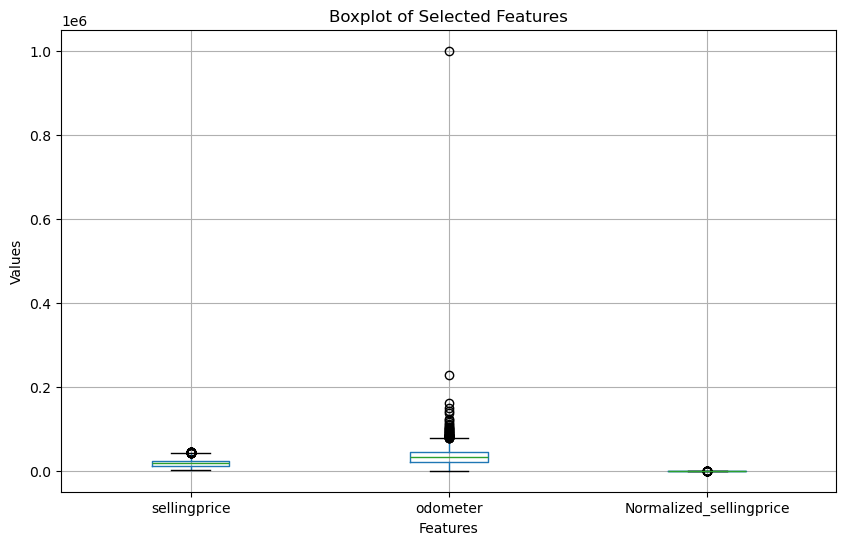

In [79]:
#7.2 แสดง box plot
import matplotlib.pyplot as plt
columns_to_plot = ['sellingprice', 'odometer', 'Normalized_sellingprice']

plt.figure(figsize=(10, 6))
df.boxplot(column=columns_to_plot)
plt.title('Boxplot of Selected Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()